In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# read data
df = pd.read_csv('../data/Test/unwinded_merged_OVS_2016-19.csv')

/tmp/ipykernel_109/3108100135.py:2: DtypeWarning: Columns (13,20,23,26,37,40,46,59,62,67,70,90,109,111,113,115,117,120,122,125,132,139,145,147,149,154,159,161,170,176,181,183,185,187,189,191,193,209,215,220,222,224,226,228,232,234,237,239,256,259,262,287,291,303,307,327,340,344,364,399,406,420,430,441,454,481,491,496,512,519,525,543,547,551,674,706,758,764,768,773,777,781,786,804,806,808,983,1005,1006,1007,1009,1121,1123,1126,1127,1130,1131,1142,1143,1144,1146,1147,1158,1164,1170,1176,1178,1183,1200,1202,1228,1238,1239,1243,1245,1251,1252,1254,1255,1256,1257,1258,1262,1288,1300,1311) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Test/unwinded_merged_OVS_2016-19.csv')


In [86]:
# mixed dtypes
cols = [13,20,23,26,37,40,46,59,62,67,70,90,109,111,113,115,117,120,125,132,139,145,147,149,154,159,161,170,176,181,183,185,187,189,191,193,209,215,220,222,224,226,228,232,234,237,239,256,259,287,291,327,340,344,364,399,406,420,430,441,454,481,491,496,512,519,525,543,547,551,674,706,758,764,768,773,777,781,786,804,806,808,983,1006,1007,1092,1121,1123,1126,1127,1130,1131,1142,1143,1144,1146,1147,1158,1170]
selected_cols = df.iloc[:,cols]

# Iterate over the selected columns to get up to 25 unique values
for ii, col in enumerate(selected_cols.columns):
    unique_values = selected_cols[col].dropna().unique()[:3]  # Get unique, non-null values and slice the first 25
    print(f'{ii}: {col} \t {unique_values}')

0: xstdate 	 ['2016/05/18 1450:07 +' '2016/09/14 1114:12 +' '2016/09/14 1132:32 +']
1: tgateother 	 ['Mi1633' 'D49' 'E58']
2: tflight_other 	 ['TZ128' '9W4102' 'NH6260']
3: tlocation_other 	 ['Bank Negara KTM' 'Nu sentral' 'KL SENTRAL']
4: ta4_other 	 ['Myanmese' 'Bosnian' 'Monegasque']
5: ta5_other 	 ['California' 'Isle of Man' 'Others in Europe']
6: ta6_other 	 ['Bangalor' 'Geneseo' 'Ehime']
7: tb7a_other 	 ['Ind' 'Hawaii' 'Guam']
8: tb7b_other 	 ['Fujairah' 'Sri Lank' 'AKl']
9: tb9a_other 	 ['Port dickson' 'San francisco' 'London']
10: tb9b_other 	 ['Port dickson' 'Pork dickson' 'Trivandrum']
11: tb12c15 	 ['Brother in law n sister in law' 'Tour group' 'Shoolmates']
12: tb13bc1 	 ['Engagement ceremony' 'Engagement' 'FORGOT']
13: tb13bc2 	 ['Musicals' 'Fashion show' 'Broadway Play-Annie at MBS']
14: tb13bc3 	 ['F1' 'Rugby 7' 'CANT RECALL']
15: tb13bc4 	 ['Cannot recall is from school musical events at butik timah' 'Festivals'
 'JMF']
16: tb13bc5 	 ['Hari raya' 'New year eve' 'New yea

In [87]:
for col in df.columns:
    print(col)

outlier
quarter
rep_qtr
dummy
month
vamlact
intnr
intnr_final
intnr_final_original
case
inttime
internr
stime
xstdate
revi
quotas
m1
terminal
gate
gateother
tgateother
flight
flight_other
tflight_other
location
location_other
tlocation_other
location1
vessel
tvessel
languageq
a1
a2
a2.r
a3
a4
a4_other
ta4_other
a5
a5_other
ta5_other
r.ctry
r.int1
r.int2
a6
a6_other
ta6_other
a7
b1a
b1b
b2
b3a
b3b
b4
b4.r
b5
b6
b7a
b7a_other
tb7a_other
b7b
b7b_other
tb7b_other
b7c
b8
b9a
b9a_other
tb9a_other
b9b
b9b_other
tb9b_other
b9c
b10
b10.r
b10cap
b10.surlos
b11
b11.r
b11cap
b12_1
b12_2
b12_3
b12_4
b12_9
b12_10
b12_11
b12_12
b12_13
b12_14
b12_15
tb12c15
b12number_1
b12number_2
b12number_3
b12number_4
b12number_5
b12number_6
b12number_7
b12number_8
b13a_111
b13a_112
b13a_113
b13a_114
b13a_115
b13a_116
b13a_117
b13a_118
b13a_119
b13b_1
tb13bc1
b13b_2
tb13bc2
b13b_3
tb13bc3
b13b_4
tb13bc4
b13b_5
tb13bc5
b13b_6
b13b_7
tb13bc7
b13b_8
tb13bc8
b13b_9
b13b_10
tb13bc10
b13b_11
b13b_12
b13b_13
b13b_14
b13b_

In [88]:
def StackedHorizontalBar(df, col):
    value_counts = df[col].value_counts(dropna = False).sort_index().reset_index().T
    legend, value_counts = value_counts.iloc[0], value_counts[1:]
    value_counts.columns = legend
    ax = value_counts.plot(kind = 'barh', stacked = True, figsize = (10, 1), cmap = 'viridis')
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(loc = 'upper left', bbox_to_anchor = (0, 1.5+0.25*int(len(legend)/5)), ncol = min(len(legend),5))
    plt.show()

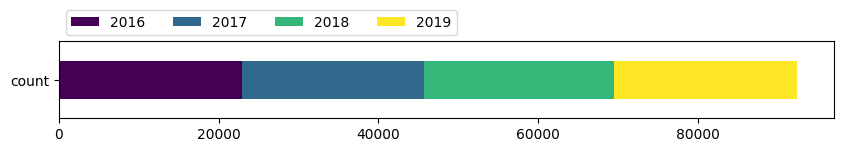

In [89]:
# filter to 2019

df = df.rename(columns = {'year': 'YEAR'})
StackedHorizontalBar(df, 'YEAR')

# df = df[df['YEAR'] == 2019]
# df = df.reset_index(drop = True)

In [90]:
# date of departure = date of arrival + length of stay
# month of arrival = month(date of arrival)
# month of departure = month(date of departure)

df['DATE_OF_ARRIVAL'] = pd.to_datetime(df['a7'])
df['DATE_OF_DEPARTURE'] = df['DATE_OF_ARRIVAL'] + pd.to_timedelta(df['b10'], unit = 'd')
df['MONTH_OF_ARRIVAL'] = df['DATE_OF_ARRIVAL'].dt.month.astype('Int64')
df['MONTH_OF_DEPARTURE'] = df['DATE_OF_DEPARTURE'].dt.month.astype('Int64')
df['LENGTH_OF_STAY'] = df['b10'].astype('Int64')

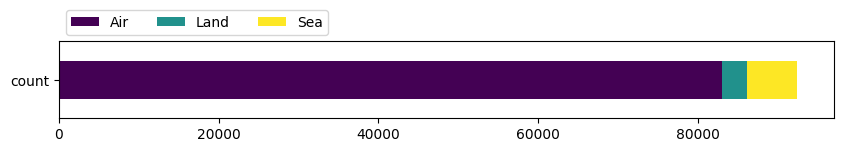

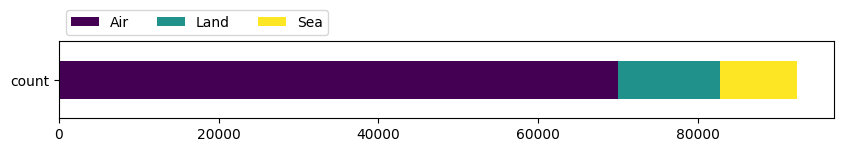

In [91]:
# mode of transport (depature/arrival) = air/land/sea

mode_map = {
    '1': 'Air',
    '2': 'Land',
    '3': 'Sea'
}
df['MODE_OF_ARRIVAL'] = df['b2'].astype(str).map(mode_map)
df['MODE_OF_DEPARTURE'] = df['m1'].astype(str).map(mode_map)

mode_counts1 = df['MODE_OF_ARRIVAL'].value_counts(dropna = False).reset_index().rename(columns = {'index': 'Value', 0: 'Count'})
mode_counts2 = df['MODE_OF_DEPARTURE'].value_counts(dropna = False).reset_index().rename(columns = {'index': 'Value', 0: 'Count'})

StackedHorizontalBar(df, 'MODE_OF_ARRIVAL')
StackedHorizontalBar(df, 'MODE_OF_DEPARTURE')

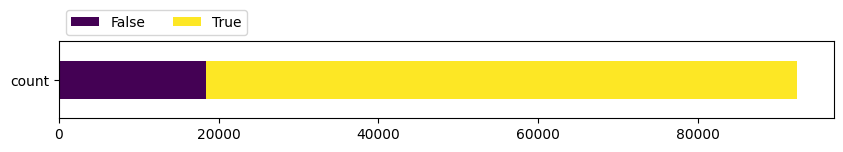

In [92]:
# language of interview
# convert to boolean English and non-English

df = df.rename(columns = {'languageq': 'LANGUAGE_OF_INTERVIEW'})
df['INTERVIEW_IN_ENGLISH'] = (df['LANGUAGE_OF_INTERVIEW'] == 1)
df['INTERVIEW_IN_ENGLISH'] = df['INTERVIEW_IN_ENGLISH'].where(df['LANGUAGE_OF_INTERVIEW'] != -1, pd.NA)

StackedHorizontalBar(df, 'INTERVIEW_IN_ENGLISH')

In [93]:
# type of passenger
# - already filtered to departing passengers only

df = df.rename(columns = {'a1': 'PASSENGER_TYPE'})

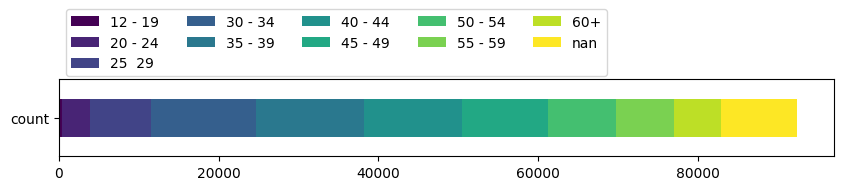

In [94]:
# age band

age_map = {
    '1': '12 - 19',
    '2': '20 - 24',
    '3': '25  29',
    '4': '30 - 34',
    '5': '35 - 39',
    '6': '40 - 44',
    '7': '45 - 49',
    '8': '50 - 54',
    '9': '55 - 59',
    '10': '60+'
}
df['AGE_BAND'] = df['a2.r'].astype(str).map(age_map)

StackedHorizontalBar(df, 'AGE_BAND')

In [95]:
# nationality

df = df.rename(columns = {'a4': 'NATIONALITY'})
print(f"% MISSING: {df['NATIONALITY'].isnull().mean()*100:.2f}%")

% MISSING: 0.00%


In [96]:
# country of residence

df = df.rename(columns = {'a5': 'COUNTRY_OF_RESIDENCE'})
print(f"% MISSING: {df['COUNTRY_OF_RESIDENCE'].isnull().mean()*100:.2f}%")

% MISSING: 0.00%


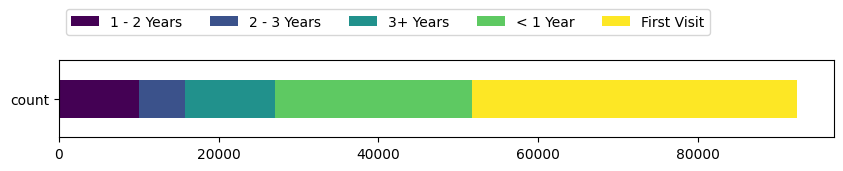

In [120]:
# time since last visit

time_map = {
    0: 'First Visit',
    1: '< 1 Year',
    2: '1 - 2 Years',
    3: '2 - 3 Years',
    4: '3+ Years'
}
df['TIME_SINCE_LAST_VISIT'] = df['b1b'].astype('Int64').fillna(0).map(time_map)

StackedHorizontalBar(df, 'TIME_SINCE_LAST_VISIT')

In [124]:
# place of origin =
# - state in Malaysia if mode of arrival == land
# - country before Singapore o/w
# - country of residence if missing
# - nationality if missing

# need to actually fill with location instead of numbers
df['PLACE_OF_ORIGIN'] = np.where(df['MODE_OF_ARRIVAL'] == 'Land', df['b4'], df['b7a'])
df['PLACE_OF_ORIGIN'] = df['PLACE_OF_ORIGIN'].fillna(df['COUNTRY_OF_RESIDENCE']).fillna(df['NATIONALITY'])

In [123]:
# destination = 
# - country after Singapore
# - country of residence if missing
# - nationality if missing

# need to actually fill with location instead of numbers
df['DESTINATION'] = df['b9a'].fillna(df['COUNTRY_OF_RESIDENCE']).fillna(df['NATIONALITY'])

In [125]:
# mode of transport = passenger class x mode of departure


In [ ]:
# nights spent before/after Singapore

df = df.rename(columns = {'B7c': 'NIGHTS_BEFORE_SG',
                          'B9c': 'NIGHTS_AFTER_SG'})

# impute nights spent before Singapore with
# - 0 if place of origin == country of residence or nationality
# - mode when grouped by same place of origin, if data is available
# - mode of all filled values o/w

conditions = (df['PLACE_OF_ORIGIN'] == df['COUNTRY_OF_RESIDENCE']) | (df['PLACE_OF_ORIGIN'] == df['NATIONALITY'])
df.loc[conditions, 'NIGHTS_BEFORE_SG'] = df.loc[conditions, 'b7c'].fillna(0).astype('Int64')
modes = df.groupby('PLACE_OF_ORIGIN')['NIGHTS_BEFORE_SG'].apply(lambda x: x.mode())
df['NIGHTS_BEFORE_SG'] = df.apply(
    lambda row: modes[row['PLACE_OF_ORIGIN']] if pd.isna(row['NIGHTS_BEFORE_SG']) else row['NIGHTS_BEFORE_SG'],
    axis = 1
)
overall_mode = df['NIGHTS_BEFORE_SG'].mode().iloc[0]
df['NIGHTS_BEFORE_SG'].fillna(overall_mode, inplace = True)

# impute nights spent after Singapore with
# - 0 if destination == country of residence or nationality
# - mode when grouped by same destination, if data is available
# - mode of all filled values o/w

conditions = (df['DESTINATION'] == df['COUNTRY_OF_RESIDENCE']) | (df['PLACE_OF_ORIGIN'] == df['NATIONALITY'])
df.loc[conditions, 'NIGHTS_AFTER_SG'] = df.loc[conditions, 'b9c'].fillna(0).astype('Int64')
modes = df.groupby('DESTINATION')['NIGHTS_AFTER_SG'].apply(lambda x: x.mode())
df['NIGHTS_AFTER_SG'] = df.apply(
    lambda row: modes[row['DESTINATION']] if pd.isna(row['NIGHTS_AFTER_SG']) else row['NIGHTS_AFTER_SG'],
    axis = 1
)
overall_mode = df['NIGHTS_AFTER_SG'].mode().iloc[0]
df['NIGHTS_AFTER_SG'].fillna(overall_mode, inplace = True)

In [ ]:
StackedHorizontalBar(df, 'NIGHTS_BEFORE_SG')

In [139]:
df.groupby('PLACE_OF_ORIGIN')['NIGHTS_BEFORE_SG'].apply(lambda x: x.mode())

PLACE_OF_ORIGIN   
1.0              0    0.0
2.0              0    0.0
3.0              0    0.0
4.0              0    0.0
9.0              0    0.0
                     ... 
224.0            0    0.0
225.0            0    0.0
226.0            0    0.0
229.0            0    0.0
231.0            0    0.0
Name: NIGHTS_BEFORE_SG, Length: 141, dtype: float64

In [ ]:
# length of stay

df = df.rename(columns = {'B10': 'LENGTH_OF_STAY'})

In [ ]:
# travel companion(s)

# includes spouse
df['TRAVEL_COMPANION=SPOUSE'] = df['B12_2'].fillna(0)

# includes partner
df['TRAVEL_COMPANION=PARTNER'] = df['B12_3'].fillna(0)

# number of parents
df['N_PARENTS'] = df['B12NUMBER_2'].fillna(0)

# number of grandparents
df['N_GRANDPARENTS'] = df['B12NUMBER_3'].fillna(0)

# number of siblings
df['N_SIBLINGS'] = df['B12NUMBER_4'].fillna(0)

# number of other relatives
df['N_OTHER_RELATIVES'] = df['B12NUMBER_5'].fillna(0)

# number of friends
df['N_FRIENDS'] = df['B12NUMBER_6'].fillna(0)

# number of other companions
df['N_OTHERS'] = df[['B12NUMBER_7', 'B12NUMBER_8', 'B12NUMBER_9']].sum(axis=1, skipna=True).fillna(0)

# number of children
df['N_CHILDREN'] = df['B12NUMBER_2'].fillna(0)

# boolean for child(ren) in 0-12, 13-19 age band
df['BOOL_CHILD_0to12Years'] = df['B12b_1'].fillna(0)
df['BOOL_CHILD_13to19Years'] = df['B12b_2'].fillna(0)

In [ ]:
# main purpose of visit

pov_map = {
    'B13a_111': 'Event',
    'B13a_112': 'Leisure',
    'B13a_113': 'Accompany',
    'B13a_114': 'Visit',
    'B13a_115': 'Gather Info',
    'B13a_116': 'Business',
    'B13a_117': 'Healthcare',
    'B13a_118': 'Education',
    'B13a_119': 'Other'
}

def MainPOV(row):
    active_columns = [col for col in columns if row[col] == 1]
    if len(active_columns) == 1:
        return pov_map[active_columns[0]]
    else:
        return 'Other'
    
df['MAIN_POV'] = df.apply(MainPOV, axis=1)

In [ ]:
# map purpose of visit subcategory

subpov_map = {
    'B13b_1': 'POV = (Event) Family Entertainment',
    'B13b_2': 'POV = (Event) Performing Arts',
    'B13b_3': 'POV = (Event) Sporting',
    'B13b_4': 'POV = (Event) Music-related',
    'B13b_5': 'POV = (Event) Cultural Festival',
    'B13b_6': 'POV = (Event) Party',
    'B13b_7': 'POV = (Event) Other',
    'B13b_8': 'POV = (Leisure) Food',
    'B13b_9': 'POV = (Leisure) Nightlife',
    'B13b_10': 'POV = (Leisure) Shopping',
    'B13b_11': 'POV = (Leisure) Experience Cultures',
    'B13b_12': 'POV = (Leisure) Cruise',
    'B13b_13': 'POV = (Leisure) Sightseeing',
    'B13b_14': 'POV = (Leisure) Rest & Relax',
    'B13b_15': 'POV = (Leisure) Integrated Resorts',
    'B13b_771': 'POV = (Leisure) Other',
    'B13b_21': 'POV = (Accompany) Business Visitor',
    'B13b_22': 'POV = (Accompany) Outpatient Consultation / Treatment',
    'B13b_23': 'POV = (Accompany) Day Surgery',
    'B13b_24': 'POV = (Accompany) Inpatient Consultation / Treatment',
    'B13b_25': 'POV = (Accompany) International Student',
    'B13b_772': 'POV = (Accompany) Other',
    'B13b_31': 'POV = (Visit) Locals',
    'B13b_32': 'POV = (Visit) International Student',
    'B13b_33': 'POV = (Gather Info) Healthcare',
    'B13b_34': 'POV = (Gather Info) Education',
    'B13b_773': 'POV = (Gather Info) Other',
    'B13b_41': 'POV = (Business) Meeting',
    'B13b_42': 'POV = (Business) Sponsored Holiday',
    'B13b_43': 'POV = (Business) Convention / Conference',
    'B13b_44': 'POV = (Business) Exhibition / Trade Show',
    'B13b_45': 'POV = (Business) General',
    'B13b_774': 'POV = (Business) Other',
    'B13b_51': 'POV = (Healthcare) Outpatient Consultation / Treatment',
    'B13b_52': 'POV = (Healthcare) Day Surgery',
    'B13b_53': 'POV = (Healthcare) Inpatient Consultation / Treatment',
    'B13b_775': 'POV = (Healthcare) Other',
    'B13b_61': 'POV = (Education) Company Training',
    'B13b_62': 'POV = (Education) Executive Training',
    'B13b_63': 'POV = (Education) Study Mission',
    'B13b_64': 'POV = (Education) Skills Development',
    'B13b_65': 'POV = (Education) Personal Enrichment',
    'B13b_66': 'POV = (Education) School Trip',
    'B13b_67': 'POV = (Education) Student Event',
    'B13b_68': 'POV = (Education) Student Enrichment',
    'B13b_776': 'POV = (Education) Other',
    'B13b_120': 'POV = (Other) Singapore as a Non-overnight Layover',
    'B13b_121': 'POV = (Other) Singapore as an Overnight Layover',
    'B13b_122': 'POV = (Other) Job Opportunities',
    'B13b_124': 'POV = (Other) Visa / Permit-related',
    'B13b_996': 'POV = (Other) Other'
}
df.rename(columns = subpov_map, inplace = True)
df[list(subpov_map.values)] = df[list(subpov_map.values)].applymap(lambda x: False if pd.isna(x) or x == 0 else True)

In [ ]:
# purchased travel package

df['TRAVEL_PACKAGE'] = df['C1a'].fillna(0)
df['tr.type'].fillna("")

# package type = travel type x inclusion of travel fare

def PackageType(row):
    tr_type = row['tr.type']
    if row['tr.type']:
        
    if row['C2']:
        fare_type = " (incl. Travel Fare)"
    else:
        fare_type = ""
    return f"{tr_type}{fare_type}"

df['PACKAGE_TYPE'] = df.apply(PackageType, axis=1)
df['PACKAGE_TYPE'] = df['PACKAGE_TYPE'].astype(str)

# cost of travel package

df['$_PACKAGE_PER_PAX'] = df['C1b.r'].fillna(0)

In [ ]:
# accommodation
# - if no nights in package, fill with 0
# - if no nights in paid accommodation, fill with nights in package
# - if no nights in unpaid accommodation, fill with length of stay - nights in paid accommodation
# - if no specified pax, impute with 1 + total number of travel companions

df['NIGHTS_IN_PACKAGE'] = df['C1c'].fillna(0)
df['NIGHTS_IN_PAID_ACCOMMODATION'] = df['C4c_8'].fillna(df['NIGHTS_IN_PACKAGE'], inplace=True)
df['NIGHTS_IN_UNPAID_ACCOMMODATION'] = df['C4c_12'].fillna(df['LENGTH_OF_STAY'] - df['NIGHTS_IN_PAID_ACCOMMODATION'], inplace=True)

df['$_ACCOMMODATION_TOTAL'] = df[['c4d_1.r', 'c4d_2.r', 'c4d_3.r', 'c4d_4.r', 'c4d_5.r', 'c4d_6.r', 'c4d_7.r', 'c4d_8.r']].sum(axis=1)

total_companions = [
    'TRAVEL_COMPANION=SPOUSE',
    'TRAVEL_COMPANION=PARTNER',
    'N_PARENTS',
    'N_GRANDPARENTS',
    'N_SIBLINGS',
    'N_OTHER_RELATIVES',
    'N_FRIENDS',
    'N_OTHERS',
    'N_CHILDREN'
]
n_pax = df[total_companions].sum(axis=1) + 1
df['PAX_IN_ACCOMMODATION'] = df['C5'].fillna(n_pax, inplace=True)

In [ ]:
# food & beverages
# - not in package unless declared
# - if no total spend, impute with sum of spend across all dining options
# - if no specified pax, impute with pax in accommodation

df['F&B_IN_PACKAGE'] = df['C6_1'].fillna(0)
df['F&B_HAWKER_IN_PACKAGE'] = df['C6b_1_1'].fillna(0)
df['F&B_CASUAL_IN_PACKAGE'] = df['C6b_2_1'].fillna(0)
df['F&B_FINE_IN_PACKAGE'] = df['C6b_3_1'].fillna(0)
df['F&B_OTHER_IN_PACKAGE'] = df['C6b_4_1'].fillna(0)

dining_map = {
    'c6c_1.r': '$_F&B_HAWKER',
    'c6c_2.r': '$_F&B_CASUAL',
    'c6c_3.r': '$_F&B_FINE',
    'c6c_4.r': '$_F&B_OTHER'
}
df.rename(columns = dining_map, inplace = True)
df['$_F&B_TOTAL'] = df['c6.tot'].fillna(df[['$_F&B_HAWKER','$_F&B_CASUAL','$_F&B_FINE','$_F&B_OTHER']].sum(axis=1))

df['PAX_DINING'] = df['C6d'].fillna(df['PAX_IN_ACCOMMODATION'])

In [ ]:
# transportation
# - not in package unless declared
# - if no total spend, impute with sum of spend in vehicle and other
# - if no specified pax, impute with pax in accommodation

df['TRANSPORT_IN_PACKAGE'] = df['C7a_1'].fillna(0)

transport_map = {
    'C7b_1.r': '$_TRANSPORT_VEHICLE',
    'C7b_2.r': '$_TRANSPORT_OTHER',
}
df.rename(columns = transport_map, inplace = True)
df['$_TRANSPORT_TOTAL'] = df['c7.tot'].fillna(df[['$_TRANSPORT_VEHICLE','$_TRANSPORT_OTHER']].sum(axis=1))

df['PAX_TRANSPORT'] = df['C7c'].fillna(df['PAX_IN_ACCOMMODATION'])

In [ ]:
# tour purchase method

method_map = {
    'C8ii_1': 'Pre-arrival Online',
    'C8ii_2': 'Post-arrival Online',
    'C8ii_4': 'Tour Desk',
    'C8ii_5': 'Hotel',
    'C8ii_6': 'Visitor Centre'
}

def PurchaseMethod(row):
    active_columns = [col for col in columns if row[col] == 1]
    if len(active_columns) == 1:
        return method_map[active_columns[0]]
    else:
        return 'Other'
    
df['TOUR_PURCHASE_METHOD'] = df.apply(PurchaseMethod, axis=1)

In [ ]:
# friends/family in Singapore
# - no unless declared

df['FRIENDS_FAMILY_IN_SG'] = df['C9'].fillna(0)

In [ ]:
# sightseeing & entertainment

